# Dataset Loding and Library Importing 

In [ ]:
import pandas as pd
import zipfile
from google.colab import files
import sqlite3
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import svm
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
pip install xgboost

In [ ]:
!git clone https://github.com/shafin191/GradOSProject.git

Cloning into 'GradOSProject'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
con = sqlite3.connect("/content/GradOSProject/Dataset/anon_jobs.db3")

cursor = con.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#print(cursor.fetchall())

In [ ]:
import zipfile
with zipfile.ZipFile('/content/GradOSProject/Dataset/anon_jobs_sqlite.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/GradOSProject/Dataset')

In [ ]:
con = sqlite3.connect("/content/GradOSProject/Dataset/anon_jobs.db3")
df = pd.read_sql_query("SELECT * from Jobs", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())
con.close()

   JobID  SubmitTime  WaitTime  RunTime  NProc  UsedCPUTime  UsedMemory  \
0      1  1136070690         0       11      1          4.0     35848.0   
1      2  1136072890         1       46      1          3.0     49216.0   
2      3  1136074695         1   197831      1          0.0         0.0   
3      4  1136074754         2   197682      1          0.0         0.0   
4      5  1136074756         2   197552      1          0.0         0.0   

   ReqNProcs   ReqTime  ReqMemory  ...  JobStructureParams UsedNetwork  \
0          1  259200.0       -1.0  ...                  -1        -1.0   
1          1     900.0       -1.0  ...                  -1        -1.0   
2          1  259200.0       -1.0  ...                  -1        -1.0   
3          1  259200.0       -1.0  ...                  -1        -1.0   
4          1  259200.0       -1.0  ...                  -1        -1.0   

  UsedLocalDiskSpace UsedResources ReqPlatform ReqNetwork ReqLocalDiskSpace  \
0               -1.0     

In [ ]:
for col in df.columns:
  print(col)

JobID
SubmitTime
WaitTime
RunTime
NProc
UsedCPUTime
UsedMemory
ReqNProcs
ReqTime
ReqMemory
Status
UserID
GroupID
ExecutableID
QueueID
PartitionID
OrigSiteID
LastRunSiteID
JobStructure
JobStructureParams
UsedNetwork
UsedLocalDiskSpace
UsedResources
ReqPlatform
ReqNetwork
ReqLocalDiskSpace
ReqResources
VOID
ProjectID


In [ ]:
df.GroupID.unique()

for col in df.columns:
    print(col + " " + str(len (df[col].unique())))
    if len(df[col].unique()) <=32:
      print(df[col].unique())

JobID 404176
SubmitTime 326785
WaitTime 53042
RunTime 82498
NProc 2
[1 0]
UsedCPUTime 74963
UsedMemory 88082
ReqNProcs 1
[1]
ReqTime 32
[259200.    900.     -1. 172800.   5400.  86400. 159960.  31980.  19980.
  15960.  72000.   3600.   6000.  18000.  14160.  10800.  79980. 345600.
  53160.  26580.    600.   6600.   1200.  12000.   9960.  43200. 172740.
   8400.  15000.   7200. 102000.  30000.]
ReqMemory 8
[     -1.  819200.  614400.  512000. 1126400.  524288.  262144.  921600.]
Status 3
[1 5 0]
UserID 405
GroupID 9
['G1' 'G6' '-1' 'G4' 'G2' 'G3' 'G7' 'G5' 'G8']
ExecutableID 16
['X1' '-1' 'X2' 'X5' 'X10' 'X6' 'X8' 'X4' 'X11' 'X3' 'X7' 'X9' 'X12' 'X13'
 'X14' 'X15']
QueueID 13
['Q1' 'Q2' 'Q4' 'Q3' 'Q5' 'Q6' 'Q9' 'Q7' 'Q8' 'Q10' 'Q11' 'Q12' 'Q13']
PartitionID 2
['1' '2']
OrigSiteID 5
['clrlcgce01' 'clrlcgce02' 'clrlcgce03' 'iut15' 'opgc']
LastRunSiteID 5
['clrlcgce01' 'clrlcgce02' 'clrlcgce03' 'iut15' 'opgc']
JobStructure 1
['-1']
JobStructureParams 1
['-1']
UsedNetwork 1
[-1.]
UsedLocalD

In [ ]:
st = df[['UserID', 'GroupID']]

In [ ]:
h1 = FeatureHasher(n_features=12, input_type='string')
h2 = FeatureHasher(n_features=4, input_type='string')

f1 = h1.transform(st.UserID)
f2 = h2.transform(st.GroupID)

print(f1.toarray())
print(f2.toarray())

[[ 0. -3.  0. ...  0. -1.  0.]
 [-1. -4.  0. ... -1. -1.  0.]
 [ 1. -3.  0. ...  0. -1.  0.]
 ...
 [-1. -2.  0. ...  0. -1.  0.]
 [-1. -2.  0. ...  0. -1.  0.]
 [ 0. -1.  0. ...  0. -1.  0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 ...
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
df_userid = pd.DataFrame(f1.toarray())
df_groupid = pd.DataFrame(f2.toarray())

In [ ]:
df_userid.columns = ['U0', 'U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10', 'U11']
df_groupid.columns = ['G0', 'G1', 'G2', 'G3']

In [ ]:
df = pd.concat([df, df_userid, df_groupid], axis=1)

In [ ]:
df_un = df

In [ ]:
df = df.drop(columns=['JobStructure','JobStructureParams','UsedNetwork', 'UsedLocalDiskSpace', 'UsedResources','ReqPlatform', 'ReqNetwork', 'ReqLocalDiskSpace', 'ReqResources', 'VOID', 'ProjectID', 'ReqMemory'])

In [ ]:
df

,JobID,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,Status,...,U6,U7,U8,U9,U10,U11,G0,G1,G2,G3
0,1,1136070690,0,11,1,4.0,35848.0,1,259200.0,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,2,1136072890,1,46,1,3.0,49216.0,1,900.0,1,...,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,3,1136074695,1,197831,1,0.0,0.0,1,259200.0,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
3,4,1136074754,2,197682,1,0.0,0.0,1,259200.0,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,5,1136074756,2,197552,1,0.0,0.0,1,259200.0,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404171,404172,1167599832,283,4423,1,3733.0,76108.0,1,259200.0,1,...,0.0,0.0,2.0,0.0,-1.0,0.0,0.0,1.0,0.0,1.0
404172,404173,1167599984,1,40,1,19.0,0.0,1,259200.0,1,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
404173,404174,1167602099,3,35,1,19.0,0.0,1,259200.0,1,...,0.0,0.0,-2.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
404174,404175,1167602912,1,40,1,17.0,0.0,1,259200.0,1,...,0.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df['ReqTime'].unique()

In [ ]:
#for i in df['ReqTime'].unique():
#  print(i)

df['Time_Difference_WaitRun'] = df['ReqTime'] - df['RunTime']

In [ ]:
df[['RunTime', 'ReqTime', 'Time_Difference_WaitRun']]

,RunTime,ReqTime,Time_Difference_WaitRun
0,11,259200.0,259189.0
1,46,900.0,854.0
2,197831,259200.0,61369.0
3,197682,259200.0,61518.0
4,197552,259200.0,61648.0
...,...,...,...
404171,4423,259200.0,254777.0
404172,40,259200.0,259160.0
404173,35,259200.0,259165.0
404174,40,259200.0,259160.0


In [ ]:
df_cancelled = df.loc[(df['Status']  ==5) & (df['GroupID']=='G3')]

In [ ]:
df_cancelled.groupby('UserID').count()

,JobID,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,ReqMemory,Status,GroupID,ExecutableID,QueueID,PartitionID,OrigSiteID,LastRunSiteID,Time_Difference_WaitRun
UserID,,,,,,,,,,,,,,,,,,
U1002S0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
U1003S0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
U1004S0,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
U1007S0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
U1008S0,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U70,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
U8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
U81,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122


In [ ]:
df_failed = df.loc[(df['Status']  ==0) & (df['GroupID']=='G3')]
len(df_failed)

2621

In [ ]:
df_failed.groupby('UserID').count()
print(len(df_failed.groupby('UserID').count()))

60


In [ ]:
df.loc[(df['RunTime'] == 0)]

,JobID,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,ReqMemory,Status,UserID,GroupID,ExecutableID,QueueID,PartitionID,OrigSiteID,LastRunSiteID,Time_Difference_WaitRun
436,437,1136375907,1,0,1,0.0,0.0,1,5400.0,-1.0,1,U1042S0,G1,X2,Q6,1,clrlcgce01,clrlcgce01,5400.0
459,460,1136379717,327,0,1,0.0,0.0,1,5400.0,-1.0,1,U1042S0,G1,X2,Q6,1,clrlcgce01,clrlcgce01,5400.0
6018,6019,1138515399,19919,0,1,0.0,0.0,1,259200.0,-1.0,1,U1031S0,G6,X1,Q4,1,clrlcgce01,clrlcgce01,259200.0
6019,6020,1138515580,19738,0,1,0.0,0.0,1,259200.0,-1.0,1,U1031S0,G6,X1,Q4,1,clrlcgce01,clrlcgce01,259200.0
6023,6024,1138515878,19446,0,1,0.0,0.0,1,259200.0,-1.0,1,U1031S0,G6,X1,Q4,1,clrlcgce01,clrlcgce01,259200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397038,397039,1161813157,48672,0,1,0.0,0.0,1,259200.0,-1.0,1,U40,G3,X1,Q8,1,opgc,opgc,259200.0
397212,397213,1161947215,44001,0,1,0.0,0.0,1,259200.0,-1.0,1,U40,G3,X1,Q8,1,opgc,opgc,259200.0
397483,397484,1162119055,2,0,1,0.0,0.0,1,259200.0,-1.0,1,U187,G8,X1,Q12,1,opgc,opgc,259200.0
397719,397720,1162305416,1,0,1,0.0,0.0,1,259200.0,-1.0,1,U4028S4,G1,X3,Q4,1,opgc,opgc,259200.0


In [ ]:
df_valid = df.loc[(df['RunTime'] > -1)]

In [ ]:
len(df_valid)

347611

In [ ]:
for i in df_valid['ReqMemory'].unique():
  print(i)

KeyError: ignored

In [ ]:
df_valid.loc[(df_valid['ReqMemory'] == -1)].GroupID.unique()

array(['G1', 'G6', 'G4', 'G2', 'G3', 'G7', 'G5', 'G8'], dtype=object)

In [ ]:
df_valid.groupby('GroupID').count()

,JobID,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,ReqMemory,Status,UserID,ExecutableID,QueueID,PartitionID,OrigSiteID,LastRunSiteID,Time_Difference_WaitRun
GroupID,,,,,,,,,,,,,,,,,,
G1,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311,24311
G2,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792,37792
G3,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508,145508
G4,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681,88681
G5,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702,9702
G6,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924,15924
G7,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790,13790
G8,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903


In [ ]:
(df_valid.groupby('GroupID')['UserID'].nunique())

GroupID
G1    109
G2     46
G3    159
G4     47
G5     10
G6     16
G7     11
G8      8
Name: UserID, dtype: int64

In [ ]:
def q25(x):
    return x.quantile(0.25)

# 90th Percentile
def q50(x):
    return x.quantile(0.50)

def q75(x):
    return x.quantile(0.75)

def q99(x):
    return x.quantile(1.0)

In [ ]:
result = df.groupby('GroupID').agg({'RunTime': [q25,q50,q75,q99, 'mean','median','std', 'min', 'max', 'count']})
result

RunTime                     ...                     
             q25      q50       q75  ... min      max   count
GroupID                              ...                     
-1          -1.0     -1.0     -1.00  ...  -1       -1   56565
G1          11.0     43.0     80.00  ...   0   259251   24311
G2         131.0  34915.5  91629.75  ...   0  1535085   37792
G3         215.0   3679.0  30952.00  ...   0  1565768  145508
G4          30.0    626.0  62767.00  ...   0  1508149   88681
G5         178.0    575.5  22036.25  ...   0   259304    9702
G6       19143.0  20695.5  22933.50  ...   0  1461152   15924
G7         477.0  36495.0  72063.00  ...   0  1575814   13790
G8          56.0     81.0    150.00  ...   0     9347   11903

[9 rows x 10 columns]

In [ ]:
result = df.groupby('GroupID').agg({'UsedMemory': [q25,q50,q75,q99, 'mean','median','std', 'min', 'max', 'count']})
result

NameError: ignored

#Dataset Analysis

In [ ]:
total_jobs = len(df)
total_users = len(df.UserID.unique())
total_groups = len(df.GroupID.unique())
print("Total Jobs: " + str(total_jobs))
print("Total Users: " + str(total_users))
print("Total Groups: " + str(total_groups))

Total Jobs: 404176
Total Users: 405
Total Groups: 9


In [ ]:
total_jobs = len(df_valid)
total_users = len(df_valid.UserID.unique())
total_groups = len(df_valid.GroupID.unique())
print("Total Jobs: " + str(total_jobs))
print("Total Users: " + str(total_users))
print("Total Groups: " + str(total_groups))

Total Jobs: 347611
Total Users: 404
Total Groups: 8


In [ ]:
total_users = len(df.UserID.unique())

In [ ]:
df_success = df.loc[(df['RunTime']>-1) & (df['Status']==1)]

In [ ]:
len(df_success)

336085

In [ ]:
print(len(df_success.UserID.unique()))
result2 = df_success.groupby('UserID').agg({'RunTime': ['mean', 'min', 'max', 'count']})
print(result2)

398
              RunTime                   
                 mean  min     max count
UserID                                  
U1       11238.142857   25   35829    14
U10         40.000000   40      40     1
U1001S0    928.800000   18    2122     5
U1002S0  11344.215359    1  156273  1797
U1003S0   8784.572022    0  161494   722
...               ...  ...     ...   ...
U92      13799.351032   23   85361   339
U96         21.750000   14      39     4
U97         10.000000   10      10     1
U98         14.500000   14      15     2
U99       2534.200000  118    4597     5

[398 rows x 4 columns]


In [ ]:
result2.to_csv('result2.csv')

In [ ]:
result2 = pd.read_csv('result2.csv')
result2 = result2.set_axis(['UserID', 'AvgTime', 'MinTime', 'MaxTime', 'TotalJobs'], axis=1, inplace=False)
#df2 = df.set_axis(['V', 'W', 'X', 'Y', 'Z'], axis=1, inplace=False)
result2 = result2.drop(result2.index[[0,1]])
result2 = result2.reset_index()
result2 = result2.drop(columns=['index'])
#df.drop(df.index[[1,3]], inplace=True)
print(result2)

      UserID             AvgTime MinTime MaxTime TotalJobs
0         U1  11238.142857142857      25   35829        14
1        U10                40.0      40      40         1
2    U1001S0               928.8      18    2122         5
3    U1002S0  11344.215358931553       1  156273      1797
4    U1003S0   8784.572022160664       0  161494       722
..       ...                 ...     ...     ...       ...
393      U92  13799.351032448378      23   85361       339
394      U96               21.75      14      39         4
395      U97                10.0      10      10         1
396      U98                14.5      14      15         2
397      U99              2534.2     118    4597         5

[398 rows x 5 columns]


In [ ]:
result2.AvgTime = pd.to_numeric(result2.AvgTime)
result2['AvgTime'].max()

134973.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5a9198a10>]],
      dtype=object)

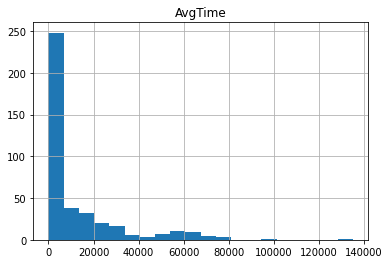

In [ ]:
result2.hist(column="AvgTime", bins=20)

In [ ]:
result2

,UserID,AvgTime,MinTime,MaxTime,TotalJobs
0,U1,11238.142857,25,35829,14
1,U10,40.000000,40,40,1
2,U1001S0,928.800000,18,2122,5
3,U1002S0,11344.215359,1,156273,1797
4,U1003S0,8784.572022,0,161494,722
...,...,...,...,...,...
393,U92,13799.351032,23,85361,339
394,U96,21.750000,14,39,4
395,U97,10.000000,10,10,1
396,U98,14.500000,14,15,2


In [ ]:
result2['AvgTime'].value_counts().describe()

count    369.000000
mean       1.078591
std        0.528330
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: AvgTime, dtype: float64

In [ ]:
df_xx.ReqNProcs.unique()

array([1])

In [ ]:
print(result2.loc[(result2['AvgTime'] >= 0) & (result2['AvgTime'] <= 100)].count())
print(result2.loc[(result2['AvgTime'] > 100) & (result2['AvgTime'] <= 200)].count())
print(result2.loc[(result2['AvgTime'] > 200) & (result2['AvgTime'] <= 300)].count())
print(result2.loc[(result2['AvgTime'] > 300) & (result2['AvgTime'] <= 400)].count())
print(result2.loc[(result2['AvgTime'] > 400) & (result2['AvgTime'] <= 500)].count())
print(result2.loc[(result2['AvgTime'] > 500) & (result2['AvgTime'] <= 600)].count())
print(result2.loc[(result2['AvgTime'] > 600) & (result2['AvgTime'] <= 700)].count())

UserID       133
AvgTime      133
MinTime      133
MaxTime      133
TotalJobs    133
dtype: int64
UserID       20
AvgTime      20
MinTime      20
MaxTime      20
TotalJobs    20
dtype: int64
UserID       14
AvgTime      14
MinTime      14
MaxTime      14
TotalJobs    14
dtype: int64
UserID       6
AvgTime      6
MinTime      6
MaxTime      6
TotalJobs    6
dtype: int64
UserID       1
AvgTime      1
MinTime      1
MaxTime      1
TotalJobs    1
dtype: int64
UserID       3
AvgTime      3
MinTime      3
MaxTime      3
TotalJobs    3
dtype: int64
UserID       5
AvgTime      5
MinTime      5
MaxTime      5
TotalJobs    5
dtype: int64


In [ ]:
total_users_success = len(df.UserID.unique())

In [ ]:
df_x =df_valid

In [ ]:
len(df_x.UserID.unique())

404

In [ ]:
df_x

,JobID,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,Status,...,U6,U7,U8,U9,U10,U11,G0,G1,G2,G3
0,1,1136070690,0,11,1,4.0,35848.0,1,259200.0,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,2,1136072890,1,46,1,3.0,49216.0,1,900.0,1,...,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,3,1136074695,1,197831,1,0.0,0.0,1,259200.0,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
3,4,1136074754,2,197682,1,0.0,0.0,1,259200.0,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,5,1136074756,2,197552,1,0.0,0.0,1,259200.0,1,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404171,404172,1167599832,283,4423,1,3733.0,76108.0,1,259200.0,1,...,0.0,0.0,2.0,0.0,-1.0,0.0,0.0,1.0,0.0,1.0
404172,404173,1167599984,1,40,1,19.0,0.0,1,259200.0,1,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
404173,404174,1167602099,3,35,1,19.0,0.0,1,259200.0,1,...,0.0,0.0,-2.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
404174,404175,1167602912,1,40,1,17.0,0.0,1,259200.0,1,...,0.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_xx = df_x[['SubmitTime','WaitTime', 'RunTime', 'NProc', 	'UsedCPUTime', 	'UsedMemory',
 	'ReqNProcs' ,	'ReqTime', 	'Status', 'U0', 'U1', 'U2', 'U3', 'U4', 'U5', 
	'U6', 'U7', 'U8', 'U9', 'U10', 'U11', 'G0', 'G1', 'G2', 'G3' ]]

In [ ]:
df_xx

,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,Status,U0,...,U6,U7,U8,U9,U10,U11,G0,G1,G2,G3
0,1136070690,0,11,1,4.0,35848.0,1,259200.0,1,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,1136072890,1,46,1,3.0,49216.0,1,900.0,1,-1.0,...,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,1136074695,1,197831,1,0.0,0.0,1,259200.0,1,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
3,1136074754,2,197682,1,0.0,0.0,1,259200.0,1,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,1136074756,2,197552,1,0.0,0.0,1,259200.0,1,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404171,1167599832,283,4423,1,3733.0,76108.0,1,259200.0,1,0.0,...,0.0,0.0,2.0,0.0,-1.0,0.0,0.0,1.0,0.0,1.0
404172,1167599984,1,40,1,19.0,0.0,1,259200.0,1,0.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
404173,1167602099,3,35,1,19.0,0.0,1,259200.0,1,-1.0,...,0.0,0.0,-2.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
404174,1167602912,1,40,1,17.0,0.0,1,259200.0,1,-1.0,...,0.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.utils import shuffle
df_xx = shuffle(df_xx)

In [ ]:
df_xx.to_csv('Data_Grad_OS.csv')

In [ ]:
df_xx = pd.read_csv('Data_Grad_OS.csv')

In [ ]:
x1 = df_xx.drop(columns=['RunTime']) 
y1 = df_xx[['RunTime']] 

In [ ]:
from sklearn import preprocessing
from sklearn import *

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
scaler = StandardScaler()

In [ ]:
x_std = scaler.fit_transform(x1)
y_std = scaler.fit_transform(y1)

array([[-0.871, -1.648, -0.194, ...,  0.341,  0.   , -0.349],
       [ 0.03 , -0.719, -0.194, ...,  0.341,  0.   , -0.349],
       [-1.371, -0.376, -0.135, ...,  0.341,  0.   ,  2.863],
       ...,
       [-0.93 ,  1.899,  0.046, ...,  0.341,  0.   , -0.349],
       [-1.104,  1.003,  0.791, ...,  0.341,  0.   ,  2.863],
       [ 1.349, -1.292, -0.194, ...,  0.341,  0.   , -0.349]])

In [ ]:
df_norm = df_xx
x_norm = df_norm.drop(columns=['RunTime'])
y_norm = df_norm[['RunTime']]
X_train_minmax = min_max_scaler.fit_transform(x_norm)
Y_train_minmax= min_max_scaler.fit_transform(y_norm)

In [ ]:
from time import time, ctime

In [ ]:
t1 = time()
clf2 = KNeighborsRegressor(n_neighbors=5)
scores2 = cross_val_score(clf2, x1, y1, cv=5)
scores2
t2 = time()
print(t2-t1)


1934.9370982646942


In [ ]:
(t2-t1)/60

34.50718936920166

In [ ]:
print(scores2)

[0.847 0.866 0.866 0.778 0.842]


In [ ]:
np.average(scores2)

0.8399480572778089

In [ ]:
t1 = time()
clf2 = KNeighborsRegressor(n_neighbors=5)
scores2_n = cross_val_score(clf2, X_train_minmax, Y_train_minmax, cv=5)
print(scores2_n)
t2 = time()
print(t2-t1)

[0.907 0.937 0.894 0.831 0.912]
2070.4313621520996


In [ ]:
t1 = time()
clf = LinearRegression()
scores3 = cross_val_score(clf, X_train_minmax, Y_train_minmax, cv=5)
scores3
t2 = time()
print(scores3)
print(t2-t1)
#reg = LinearRegression().fit(x, y)
#p = reg.predict(x)
#mean_squared_error(p, y)
#accuracy_score(p,Yq)
#reg.score(x, y)
#array([0.75595197, 0.82526499, 0.59362604, 0.76396657, 0.75525232]) [Without user and group id]


[0.755 0.768 0.766 0.663 0.749]
1.8851299285888672


In [ ]:
np.average(scores3)

0.7401472252969319

In [ ]:
t1 = time()
clf = svm.LinearSVR(C=100,max_iter=10000)
scores8 = cross_val_score(clf, X_train_minmax, Y_train_minmax.ravel(), cv=5)
t2= time()
print(t2-t1)
print(scores8)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


4591.895816087723
[0.749 0.75  0.757 0.661 0.628]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print(t2-t1)

4591.895816087723


In [ ]:
np.average(scores8)

0.7091459952464364

In [ ]:
t1 = time()
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor()
scores4 = cross_val_score(reg1, x1, y1.values.ravel(), cv=5, n_jobs=-1,)
t2 = time()
print(t2-t1)
print(scores4)
#array([0.86224086, 0.91974533, 0.70424848, 0.83547894, 0.89233734])[Without user and group id]

339.9292106628418
[0.871 0.891 0.888 0.773 0.871]


In [ ]:
np.average(scores4)

0.8587489019003399

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(random_state=1)
scores = cross_val_score(reg1, x_std, y_std.values.ravel(), cv=5, n_jobs=-1)
scores

array([0.871, 0.891, 0.885, 0.775, 0.866])

In [ ]:
y1.values.ravel()

array([    11,     46, 197831, ...,     35,     40,     45])

In [ ]:
df_xx.Status.unique()

array([1, 0, 5])

In [ ]:
q=y1.RunTime.unique()

In [ ]:
len(q)

82497

In [ ]:
type(q)

numpy.ndarray

In [ ]:
np.sort(q)

array([      0,       1,       2, ..., 1535085, 1565768, 1575814])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
t1 = time()
reg1 = DecisionTreeRegressor(random_state=1, max_depth=20)
scores5 = cross_val_score(reg1, x1, y1.values.ravel(), cv=5, n_jobs=-1, )
t2 = time()
print(t2-t1)
print(scores5)

15.400207996368408
[0.9   0.937 0.892 0.852 0.874]


In [ ]:
np.average(scores5)

0.891135023756731

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
t1 = time()
reg1 = RandomForestRegressor(max_depth=20)
scores6 = cross_val_score(reg1, x1, y1.values.ravel(), cv=5, n_jobs=-1 )
t2 = time()
print(t2-t1)
print(scores6)


971.8111579418182
[0.922 0.965 0.929 0.87  0.925]


In [ ]:
df_xx

,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,Status,U0,...,U6,U7,U8,U9,U10,U11,G0,G1,G2,G3
0,1136070690,0,11,1,4.0,35848.0,1,259200.0,1,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,1136072890,1,46,1,3.0,49216.0,1,900.0,1,-1.0,...,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,1136074695,1,197831,1,0.0,0.0,1,259200.0,1,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
3,1136074754,2,197682,1,0.0,0.0,1,259200.0,1,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,1136074756,2,197552,1,0.0,0.0,1,259200.0,1,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404171,1167599832,283,4423,1,3733.0,76108.0,1,259200.0,1,0.0,...,0.0,0.0,2.0,0.0,-1.0,0.0,0.0,1.0,0.0,1.0
404172,1167599984,1,40,1,19.0,0.0,1,259200.0,1,0.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
404173,1167602099,3,35,1,19.0,0.0,1,259200.0,1,-1.0,...,0.0,0.0,-2.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0
404174,1167602912,1,40,1,17.0,0.0,1,259200.0,1,-1.0,...,0.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(np.average(scores6))

0.9222374294076264


In [ ]:
import xgboost as xg
from xgboost import cv

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, max_depth = 20)

In [ ]:
t1 = time()
scores7 = cross_val_score(xgb_r, x1, y1.values.ravel(), cv=5, n_jobs=-1 )
t2 = time()
print(t2-t1)
print(scores7)

108.77532362937927
[0.891 0.895 0.821 0.837 0.832]


In [ ]:
np.average(scores7)

0.8589855714929634

## Deep Learning

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [ ]:
train_dataset = df_xx.sample(frac=0.8, random_state=0)
test_dataset = df_xx.drop(train_dataset.index)

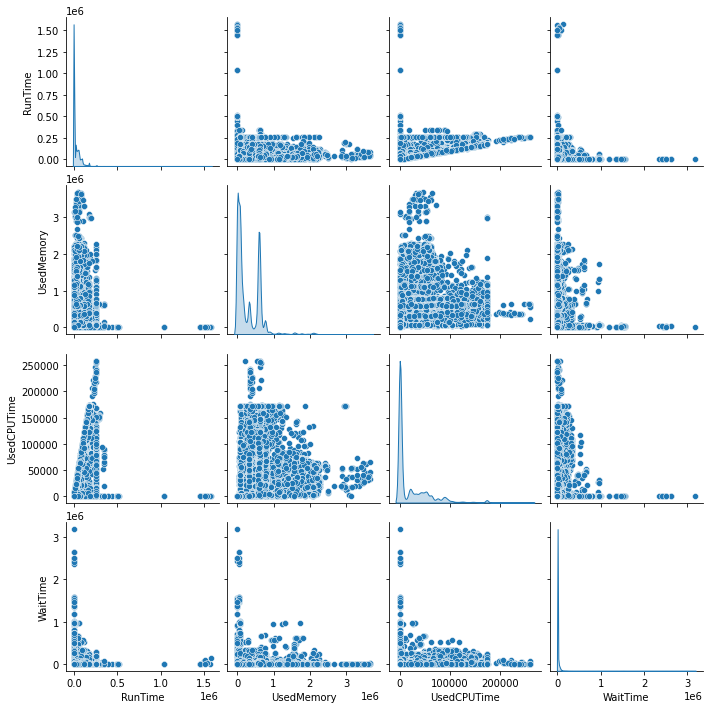

In [ ]:
sns.pairplot(train_dataset[['RunTime', 'UsedMemory', 'UsedCPUTime', 'WaitTime']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SubmitTime,278089.0,1.152137e+09,7.960874e+06,1.136070e+09,1.145631e+09,1.152242e+09,1.158576e+09,1.167604e+09
WaitTime,278089.0,9.475964e+03,4.808252e+04,0.000000e+00,1.000000e+00,3.000000e+00,3.716000e+03,3.182836e+06
RunTime,278089.0,2.521133e+04,4.100579e+04,0.000000e+00,6.600000e+01,2.307000e+03,4.168700e+04,1.575814e+06
NProc,278089.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
UsedCPUTime,278089.0,2.196285e+04,3.466326e+04,0.000000e+00,8.000000e+00,6.800000e+01,3.852900e+04,2.593160e+05
UsedMemory,278089.0,2.953195e+05,3.432105e+05,0.000000e+00,4.341200e+04,1.348480e+05,5.856240e+05,3.667652e+06
ReqNProcs,278089.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
ReqTime,278089.0,2.581397e+05,6.866327e+04,6.000000e+02,2.592000e+05,2.592000e+05,2.592000e+05,3.456000e+05
ReqMemory,278089.0,8.855998e+04,2.643503e+05,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.126400e+06
Status,278089.0,1.060660e+00,5.572943e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('RunTime')
test_labels = test_features.pop('RunTime')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
SubmitTime,1.152137e+09,7.960874e+06
WaitTime,9.475964e+03,4.808252e+04
RunTime,2.521133e+04,4.100579e+04
NProc,1.000000e+00,0.000000e+00
UsedCPUTime,2.196285e+04,3.466326e+04
UsedMemory,2.953195e+05,3.432105e+05
ReqNProcs,1.000000e+00,0.000000e+00
ReqTime,2.581397e+05,6.866327e+04
ReqMemory,8.855998e+04,2.643503e+05
Status,1.060660e+00,5.572943e-01


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[1.152e+09 9.476e+03 1.000e+00 2.196e+04 2.953e+05 1.000e+00 2.581e+05
  8.856e+04 1.061e+00]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 1.16e+09  6.28e+02  1.00e+00  7.52e+04  6.25e+05  1.00e+00  3.46e+05
  -1.00e+00  1.00e+00]]

Normalized: [[ 0.74 -0.18  0.    1.54  0.96  0.    1.27 -0.34 -0.11]]


In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

array([[ 1.785],
       [ 0.568],
       [ 0.227],
       [ 0.593],
       [ 0.074],
       [-0.413],
       [-1.076],
       [ 1.506],
       [-0.667],
       [-0.437]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.395],
       [-0.479],
       [ 0.536],
       [ 0.056],
       [ 0.386],
       [ 0.3  ],
       [ 0.685],
       [-0.281],
       [ 0.163]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [ ]:
history

In [ ]:
history.history['loss']

[3075.33447265625,
 3075.33642578125,
 3075.342529296875,
 3075.33642578125,
 3075.34423828125,
 3075.334228515625,
 3075.346435546875,
 3075.345947265625,
 3075.343994140625,
 3075.357177734375,
 3075.358642578125,
 3075.346923828125,
 3075.350830078125,
 3075.343505859375,
 3075.33935546875,
 3075.34716796875,
 3075.339599609375,
 3075.35009765625,
 3075.3515625,
 3075.35009765625,
 3075.34228515625,
 3075.348876953125,
 3075.349365234375,
 3075.353271484375,
 3075.345947265625,
 3075.344482421875,
 3075.34423828125,
 3075.34375,
 3075.35498046875,
 3075.34521484375,
 3075.344482421875,
 3075.34521484375,
 3075.34912109375,
 3075.347412109375,
 3075.357666015625,
 3075.34033203125,
 3075.346923828125,
 3075.340576171875,
 3075.3408203125,
 3075.338623046875,
 3075.350341796875,
 3075.348388671875,
 3075.34716796875,
 3075.353271484375,
 3075.3486328125,
 3075.334716796875,
 3075.354248046875,
 3075.347900390625,
 3075.35498046875,
 3075.353271484375,
 3075.345703125,
 3075.3488769531

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 30000])
  plt.xlabel('Epoch')
 # plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

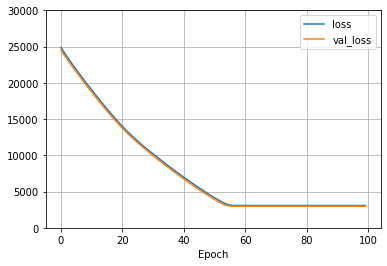

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
test_results['linear_model']

2969.48193359375

In [ ]:
len(test_results)

1

In [ ]:
test_labels

1             46
4         197552
29         93820
30         94176
35         95527
           ...  
404155      1157
404162        36
404165      4305
404166        44
404168      3405
Name: RunTime, Length: 69522, dtype: int64

In [ ]:
test_features

,SubmitTime,WaitTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,ReqMemory,Status
1,1136072890,1,1,3.0,49216.0,1,900.0,-1.0,1
4,1136074756,2,1,0.0,0.0,1,259200.0,-1.0,1
29,1136283836,2,1,93723.0,152796.0,1,259200.0,-1.0,1
30,1136283840,1,1,94088.0,152684.0,1,259200.0,-1.0,1
35,1136284078,1,1,95264.0,152700.0,1,259200.0,-1.0,1
...,...,...,...,...,...,...,...,...,...
404155,1167591746,0,1,30.0,69916.0,1,79980.0,-1.0,1
404162,1167594875,3680,1,18.0,0.0,1,259200.0,-1.0,1
404165,1167596356,180,1,3628.0,68364.0,1,259200.0,-1.0,1
404166,1167596435,1,1,19.0,0.0,1,259200.0,-1.0,1
